Shape: (25898, 10)

Columns:
 Index(['SiteID', 'BDSPPatientID', 'ShiftedCreationTime',
       'PreSleepQuestionnaire', 'HasAnnotations', 'HasStaging', 'StudyType',
       'StudyTypeName', 'AgeAtVisit', 'SexDSC'],
      dtype='object')

Data Types:
 SiteID                   object
BDSPPatientID             int64
ShiftedCreationTime      object
PreSleepQuestionnaire    object
HasAnnotations           object
HasStaging               object
StudyType                object
StudyTypeName            object
AgeAtVisit                int64
SexDSC                   object
dtype: object

Missing values:
 SiteID                       0
BDSPPatientID                0
ShiftedCreationTime          0
PreSleepQuestionnaire        0
HasAnnotations               0
HasStaging                   0
StudyType                    0
StudyTypeName            20477
AgeAtVisit                   0
SexDSC                       0
dtype: int64

Age Statistics:
 count    25898.000000
mean        53.060854
std         16

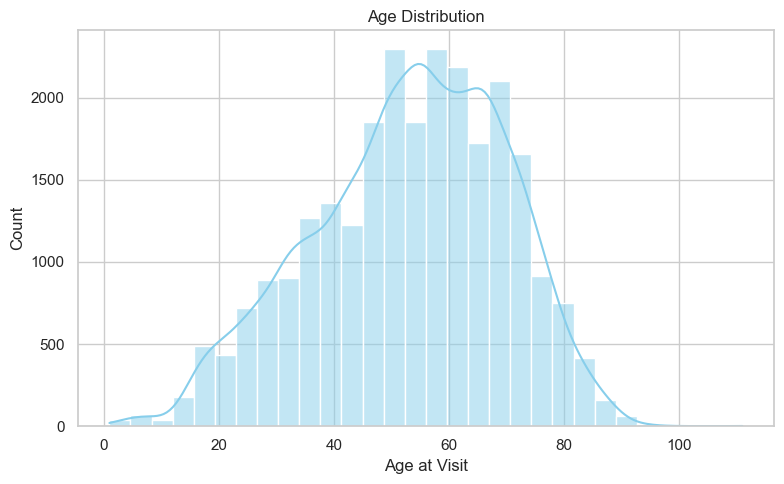

C:\Users\Hp\AppData\Local\Temp\ipykernel_1192\1613027090.py:32: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=top_studies.index, x=top_studies.values, palette="magma")


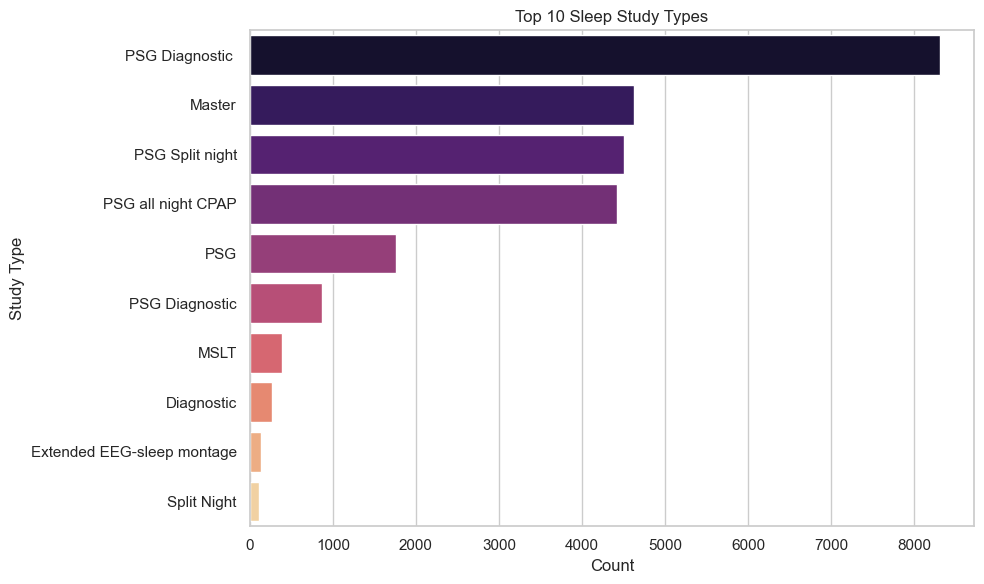

C:\Users\Hp\AppData\Local\Temp\ipykernel_1192\1613027090.py:47: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


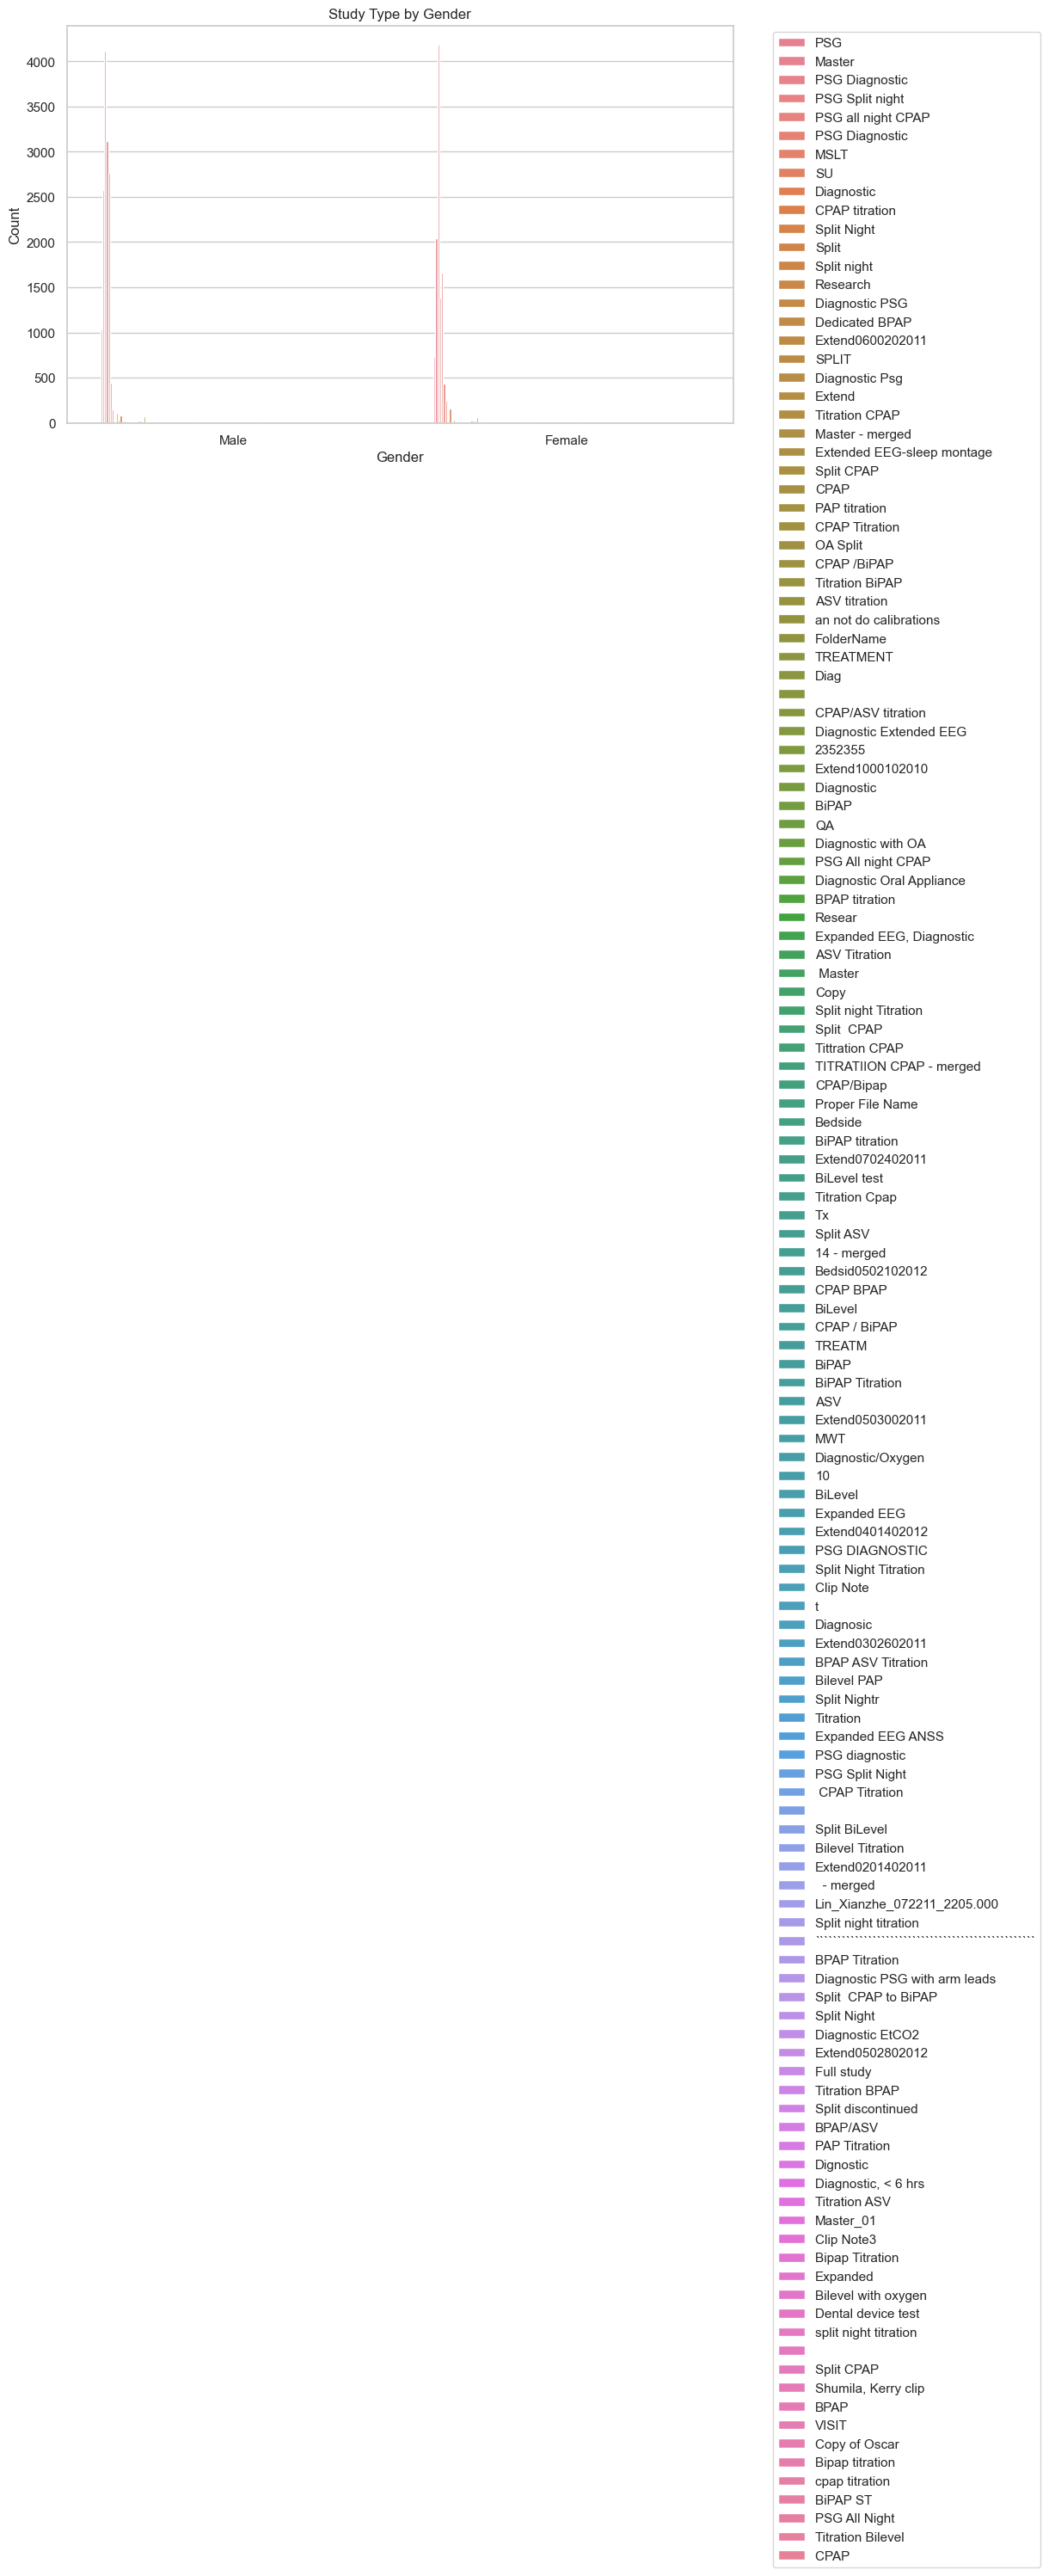

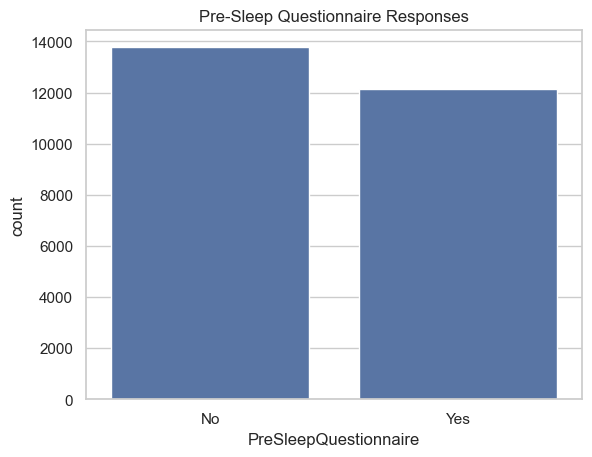

In [69]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load cleaned dataset
df = pd.read_csv("cleaned_bdsp_psg_master.csv")

# Set style for plots
sns.set(style="whitegrid")

# 1. Structure and overview
print("Shape:", df.shape)
print("\nColumns:\n", df.columns)
print("\nData Types:\n", df.dtypes)
print("\nMissing values:\n", df.isnull().sum())

# 2. Summary stats
print("\nAge Statistics:\n", df["AgeAtVisit"].describe())

# 3. Age distribution
plt.figure(figsize=(8,5))
sns.histplot(df["AgeAtVisit"], kde=True, bins=30, color='skyblue')
plt.title("Age Distribution")
plt.xlabel("Age at Visit")
plt.ylabel("Count")
plt.tight_layout()
plt.show()

# 4. StudyType frequency
plt.figure(figsize=(10,6))
top_studies = df["StudyType"].value_counts().nlargest(10)
sns.barplot(y=top_studies.index, x=top_studies.values, palette="magma")
plt.title("Top 10 Sleep Study Types")
plt.xlabel("Count")
plt.ylabel("Study Type")
plt.tight_layout()
plt.show()

# 5. StudyType by Gender
plt.figure(figsize=(10,6))
sns.countplot(data=df, x="SexDSC", hue="StudyType", order=["Male", "Female"])
plt.title("Study Type by Gender")
plt.xlabel("Gender")
plt.ylabel("Count")
plt.xticks(rotation=0)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

# 6. PreSleepQuestionnaire
sns.countplot(data=df, x="PreSleepQuestionnaire")
plt.title("Pre-Sleep Questionnaire Responses")
plt.show()




In [70]:
print(df.columns)
df.head()


Index(['SiteID', 'BDSPPatientID', 'ShiftedCreationTime',
       'PreSleepQuestionnaire', 'HasAnnotations', 'HasStaging', 'StudyType',
       'StudyTypeName', 'AgeAtVisit', 'SexDSC'],
      dtype='object')


,SiteID,BDSPPatientID,ShiftedCreationTime,PreSleepQuestionnaire,HasAnnotations,HasStaging,StudyType,StudyTypeName,AgeAtVisit,SexDSC
0,S0001,114602608,2011-05-02 22:32:00,No,Yes,Yes,PSG,NaN,31,Male
1,S0001,116554217,2021-02-25 20:45:33,No,Yes,Yes,Master,Brain Monitor,65,Male
2,S0001,115827037,2019-12-02 20:32:45,No,No,Yes,Master,Brain Monitor,67,Male
3,S0001,122082698,2009-06-08 01:46:56,No,Yes,Yes,PSG Diagnostic,NaN,67,Male
4,S0001,117862969,2016-07-20 23:19:45,Yes,Yes,Yes,PSG Diagnostic,NaN,21,Female


In [71]:
# Create binary classification target: 1 if study has both annotations and staging
df['CompleteStudy'] = ((df['HasAnnotations'] == 'Yes') & (df['HasStaging'] == 'Yes')).astype(int)

# Drop rows with missing values in key features
df = df.dropna(subset=['AgeAtVisit', 'SexDSC'])

# Encode gender
df['Sex'] = df['SexDSC'].map({'Male': 0, 'Female': 1})


In [72]:
# Features and target variable
X = df[['AgeAtVisit', 'Sex']]
y = df['CompleteStudy']


In [73]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train model
clf = RandomForestClassifier(random_state=42)
clf.fit(X_train, y_train)

# Predict and evaluate
y_pred = clf.predict(X_test)
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.00      0.00      0.00       193
           1       0.96      1.00      0.98      4987

    accuracy                           0.96      5180
   macro avg       0.48      0.50      0.49      5180
weighted avg       0.93      0.96      0.94      5180



c:\Users\Hp\Desktop\Big Data\bdsp_sleep_analysis\venv\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\Hp\Desktop\Big Data\bdsp_sleep_analysis\venv\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\Hp\Desktop\Big Data\bdsp_sleep_analysis\venv\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(averag

              precision    recall  f1-score   support

           0       0.03      0.33      0.06       193
           1       0.96      0.63      0.76      4987

    accuracy                           0.62      5180
   macro avg       0.50      0.48      0.41      5180
weighted avg       0.93      0.62      0.74      5180

              precision    recall  f1-score   support

           0       0.03      0.33      0.06       193
           1       0.96      0.63      0.76      4987

    accuracy                           0.62      5180
   macro avg       0.50      0.48      0.41      5180
weighted avg       0.93      0.62      0.74      5180



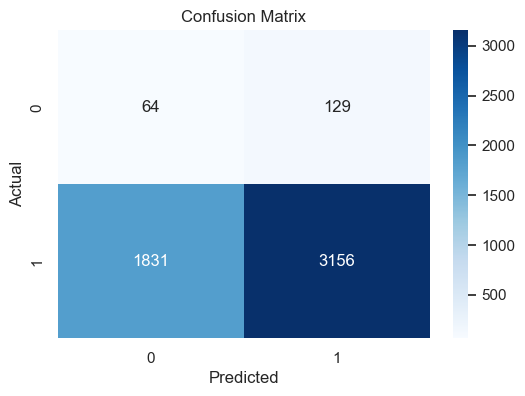

ROC AUC: 0.466


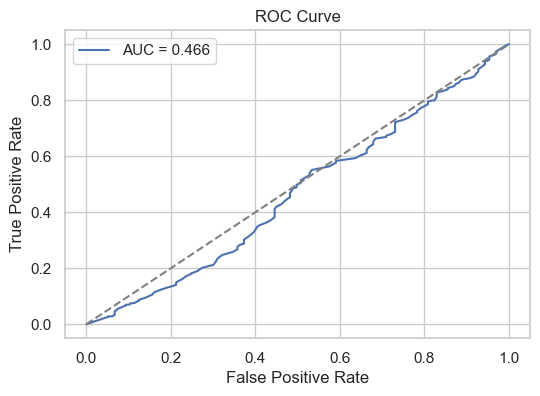

In [74]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Random Forest with balanced class weights
clf = RandomForestClassifier(class_weight='balanced', random_state=42)
clf.fit(X_train, y_train)

# Predict & evaluate
y_pred = clf.predict(X_test)
print(classification_report(y_test, y_pred))
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Classification report (you already have this)
print(classification_report(y_test, y_pred))

# 2. Confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# 3. ROC AUC (only for binary classification)
if len(set(y)) == 2:
    y_proba = clf.predict_proba(X_test)[:,1]  # Probability estimates for class 1
    auc = roc_auc_score(y_test, y_proba)
    print(f"ROC AUC: {auc:.3f}")

    fpr, tpr, thresholds = roc_curve(y_test, y_proba)
    plt.figure(figsize=(6,4))
    plt.plot(fpr, tpr, label=f"AUC = {auc:.3f}")
    plt.plot([0,1],[0,1],'--', color='gray')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.legend()
    plt.show()



## Model Evaluation

To assess the performance of our classification model, we use several key metrics:

- **Accuracy:** Measures the overall percentage of correct predictions.
- **Precision:** Indicates the proportion of positive identifications that were actually correct.
- **Recall (Sensitivity):** Measures how many actual positives were correctly identified.
- **F1-score:** The harmonic mean of precision and recall, providing a balance between the two.
- **Confusion Matrix:** Displays true positives, false positives, true negatives, and false negatives to better understand prediction errors.
- **ROC Curve and AUC:** Evaluate the model's ability to distinguish between classes at various threshold settings.

These metrics provide a comprehensive understanding of the classifier's effectiveness, especially in imbalanced datasets like ours.


              precision    recall  f1-score   support

           0       0.03      0.33      0.06       193
           1       0.96      0.63      0.76      4987

    accuracy                           0.62      5180
   macro avg       0.50      0.48      0.41      5180
weighted avg       0.93      0.62      0.74      5180



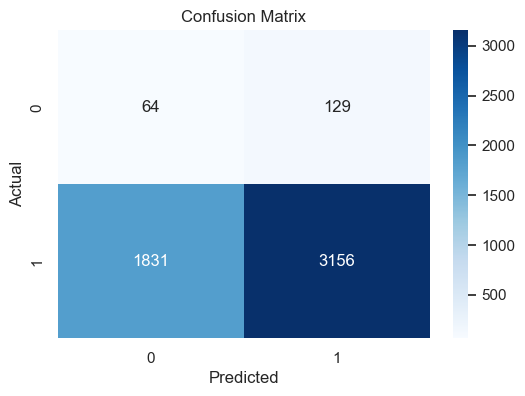

ROC AUC: 0.466


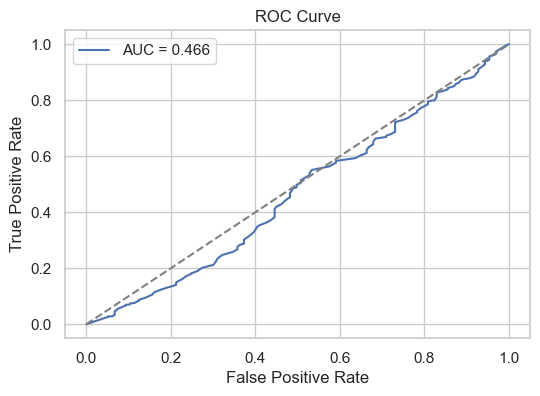

In [75]:
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Classification report
print(classification_report(y_test, y_pred))

# 2. Confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# 3. ROC AUC (binary classification only)
if len(set(y)) == 2:
    y_proba = clf.predict_proba(X_test)[:,1]
    auc = roc_auc_score(y_test, y_proba)
    print(f"ROC AUC: {auc:.3f}")

    fpr, tpr, thresholds = roc_curve(y_test, y_proba)
    plt.figure(figsize=(6,4))
    plt.plot(fpr, tpr, label=f"AUC = {auc:.3f}")
    plt.plot([0,1],[0,1],'--', color='gray')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.legend()
    plt.show()


### Interpretation of Results

- The **classification report** shows the precision, recall, and F1-score for each class, helping us identify how well the model performs on both majority and minority classes.
- The **confusion matrix** visually represents the counts of true/false positives and negatives, highlighting where the model makes errors.
- The **ROC curve** and corresponding **AUC** score indicate the model’s ability to discriminate between the two classes. An AUC closer to 1 means better performance.

Given the class imbalance in our dataset, precision and recall are critical metrics to focus on, as accuracy alone can be misleading.

Next, we will explore ways to improve the model’s ability to correctly classify the minority class.


In [76]:
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, VotingClassifier

# Imputation strategy
imputer = SimpleImputer(strategy='most_frequent')  # or 'mean' for numeric data

# Base classifiers wrapped in pipelines
lr_pipeline = Pipeline([
    ('imputer', imputer),
    ('scaler', StandardScaler()),
    ('lr', LogisticRegression(class_weight='balanced', random_state=42))
])

rf_pipeline = Pipeline([
    ('imputer', imputer),
    ('rf', RandomForestClassifier(class_weight='balanced', random_state=42))
])

gb_pipeline = Pipeline([
    ('imputer', imputer),
    ('gb', GradientBoostingClassifier(random_state=42))
])

# Ensemble Voting Classifier
voting_clf = VotingClassifier(
    estimators=[
        ('lr', lr_pipeline),
        ('rf', rf_pipeline),
        ('gb', gb_pipeline)
    ],
    voting='soft'
)

# Fit and evaluate
voting_clf.fit(X_train, y_train)
y_pred = voting_clf.predict(X_test)

from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.00      0.00      0.00       193
           1       0.96      1.00      0.98      4987

    accuracy                           0.96      5180
   macro avg       0.48      0.50      0.49      5180
weighted avg       0.93      0.96      0.94      5180



c:\Users\Hp\Desktop\Big Data\bdsp_sleep_analysis\venv\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\Hp\Desktop\Big Data\bdsp_sleep_analysis\venv\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\Hp\Desktop\Big Data\bdsp_sleep_analysis\venv\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(averag

In [ ]:
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, VotingClassifier

# Imputer for numeric features
imputer = SimpleImputer(strategy='most_frequent')  # or 'mean' for numeric

# Pipelines for each model
lr_pipeline = Pipeline([
    ('imputer', imputer),
    ('scaler', StandardScaler()),
    ('lr', LogisticRegression(class_weight='balanced', random_state=42))
])

rf_pipeline = Pipeline([
    ('imputer', imputer),
    ('rf', RandomForestClassifier(class_weight='balanced', random_state=42))
])

gb_pipeline = Pipeline([
    ('imputer', imputer),
    ('gb', GradientBoostingClassifier(random_state=42))
])

# Voting ensemble with pipelines
voting_clf = VotingClassifier(
    estimators=[
        ('lr', lr_pipeline),
        ('rf', rf_pipeline),
        ('gb', gb_pipeline)
    ],
    voting='soft'
)

voting_clf.fit(X_train, y_train)
y_pred = voting_clf.predict(X_test)
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))